In [34]:
#!pip install tensorflow==2.2

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
tf.__version__

'2.2.0'

# Data Augumentation - Creating more data from existing data

In [28]:
#for resizeing and rescaling->every_image/255

In [57]:
batch_size=16
training_imageDataGenerator=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,shear_range=0.2,
                                                zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                               validation_split=0.1)

In [64]:
train=training_imageDataGenerator.flow_from_directory(r'D:\project\3.Smoke-and-Fire-Recognition\dataset',target_size=(256,256),
                                                      color_mode='rgb',class_mode='binary',batch_size=16,subset='training')

validation=training_imageDataGenerator.flow_from_directory(r'D:\project\3.Smoke-and-Fire-Recognition\dataset',target_size=(256,256),
                                                      color_mode='rgb',class_mode='binary',batch_size=16,subset='validation')

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


# making CNN

In [52]:
#initializing CNN
cnn=tf.keras.models.Sequential()

#adding first layer
# activation mean condintion if true pass
#padding mean making wall.
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#adding third layer

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [53]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)           

# train CNN model

In [68]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'D:\project\3.Smoke-and-Fire-Recognition\models\fire_smoke_model.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [69]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


cnn.fit_generator(train,validation_data=validation,epochs=1,steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks )

772/772 [==============================] - 1144s 1s/step - loss: 0.0549 - accuracy: 0.9851 - val_loss: 0.0191 - val_accuracy: 0.9934


 # testing

In [70]:
from tensorflow.keras.models import load_model
cnn=load_model(r"D:\project\3.Smoke-and-Fire-Recognition\models\fire_smoke_model.h5")

In [71]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [79]:
image_for_testing=r'D:\project\3.Smoke-and-Fire-Recognition\dataset\fire\fire-45.7396875153.png'
test_image=image.load_img(image_for_testing,target_size=(256,256))

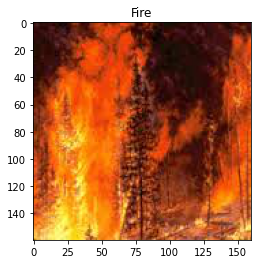

In [80]:

test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict_classes(test_image)




Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()

In [81]:
result

array([[0]])

In [ ]:
# 0->fire
# 1->smoke